In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [2]:
import os
os.environ['KAGGLE_USERNAME'] = "vanshjulka"
os.environ['KAGGLE_KEY'] = "5d2531b5bc965aa31a2a84c0bd14e0cb"
!kaggle datasets download mfaisalqureshi/spam-email
!unzip spam-email.zip

  0% 0.00/207k [00:00<?, ?B/s]
100% 207k/207k [00:00<00:00, 73.1MB/s]
Archive:  spam-email.zip
  inflating: spam.csv                


In [3]:
email = pd.read_csv('spam.csv')

In [4]:
email.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
email.tail()

,Category,Message
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


In [6]:
email.shape

(5572, 2)

In [7]:
email.isna().sum()

Category    0
Message     0
dtype: int64

In [9]:
email[email.duplicated(subset=['Category','Message'],keep=False)]

,Category,Message
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...
11,spam,"SIX chances to win CASH! From 100 to 20,000 po..."
...,...,...
5524,spam,You are awarded a SiPix Digital Camera! call 0...
5535,ham,"I know you are thinkin malaria. But relax, chi..."
5539,ham,Just sleeping..and surfing
5553,ham,Hahaha..use your brain dear


In [10]:
email.drop_duplicates(subset=['Category','Message'],keep='first',inplace=True)

In [11]:
email.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5157 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5157 non-null   object
 1   Message   5157 non-null   object
dtypes: object(2)
memory usage: 120.9+ KB


In [12]:
email.describe()

,Category,Message
count,5157,5157
unique,2,5157
top,ham,"Go until jurong point, crazy.. Available only ..."
freq,4516,1


In [14]:
email['Category'].value_counts().to_frame()

,Category
ham,4516
spam,641


In [16]:
email.loc[email['Category']=='spam','category']=1
email.loc[email['Category']=='ham','category']=0

In [17]:
email['Category']=email['category'].astype('int64')

In [18]:
email.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5157 entries, 0 to 5571
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Category  5157 non-null   int64  
 1   Message   5157 non-null   object 
 2   category  5157 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 161.2+ KB


<Axes: xlabel='category', ylabel='count'>

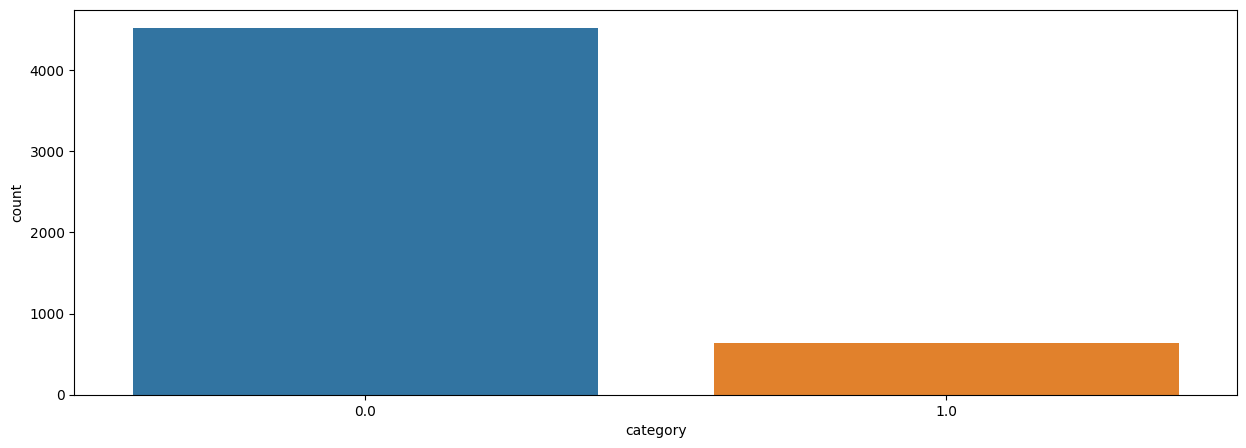

In [19]:
plt.figure(figsize=(15,5))
sns.countplot(data=email,x='category')

In [20]:
email['category'].value_counts().to_frame()

,category
0.0,4516
1.0,641


In [21]:
from sklearn.utils import resample

In [22]:
email_majority=email[email['category']==0]
email_minority=email[email['category']==1]

In [23]:
email_majority_downsample=resample(email_majority,replace=False,n_samples=641,random_state=42)

In [24]:
email_df=pd.concat([email_majority_downsample,email_minority])

In [25]:
email_df['category'].value_counts().to_frame()

,category
0.0,641
1.0,641


<Axes: xlabel='category', ylabel='count'>

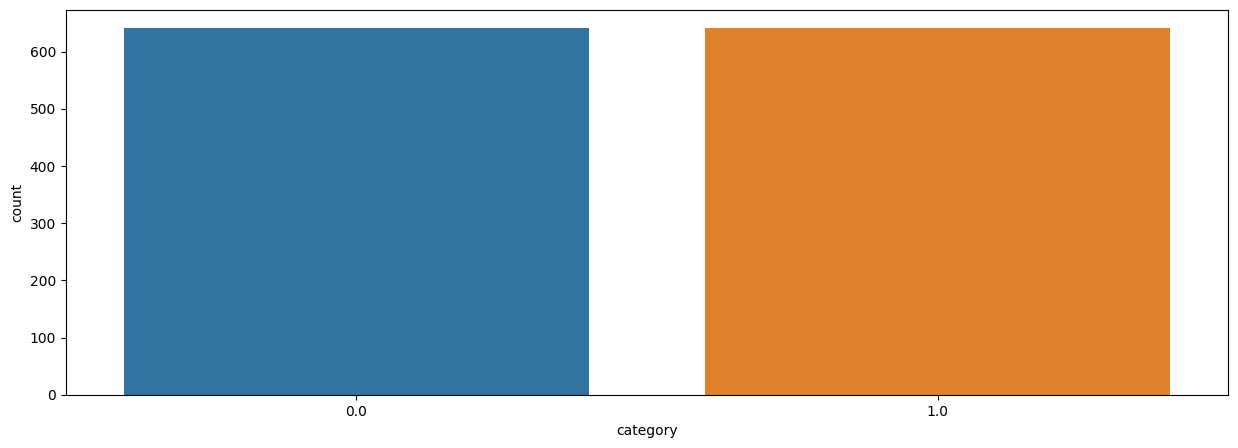

In [26]:
plt.figure(figsize=(15,5))
sns.countplot(data=email_df,x='category')

In [28]:
x=email_df['Message']
y=email_df['category']

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [31]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((897,), (385,), (897,), (385,))

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [33]:
fe=TfidfVectorizer(min_df=1,stop_words='english',lowercase=True)

In [34]:
x_train_fe=fe.fit_transform(x_train)
x_test_fe=fe.transform(x_test)

In [35]:
x_train_fe

<897x3360 sparse matrix of type '<class 'numpy.float64'>'
	with 9708 stored elements in Compressed Sparse Row format>

In [36]:
x_test_fe

<385x3360 sparse matrix of type '<class 'numpy.float64'>'
	with 3228 stored elements in Compressed Sparse Row format>

In [37]:
from sklearn.linear_model import LogisticRegression

In [38]:
lr=LogisticRegression(max_iter=500)
lr.fit(x_train_fe,y_train)
y_pred=lr.predict(x_test_fe)

In [43]:
from sklearn.metrics import confusion_matrix,recall_score,precision_score,accuracy_score,f1_score,ConfusionMatrixDisplay

In [50]:
print("accuracy score: ",accuracy_score(y_test,y_pred)*100)
print("f1_score: ",f1_score(y_test,y_pred)*100)
print("recall_score: ",recall_score(y_test,y_pred)*100)
print("precision_score: ",precision_score(y_test,y_pred)*100)

accuracy score:  95.58441558441558
f1_score:  95.15669515669516
recall_score:  92.77777777777779
precision_score:  97.6608187134503


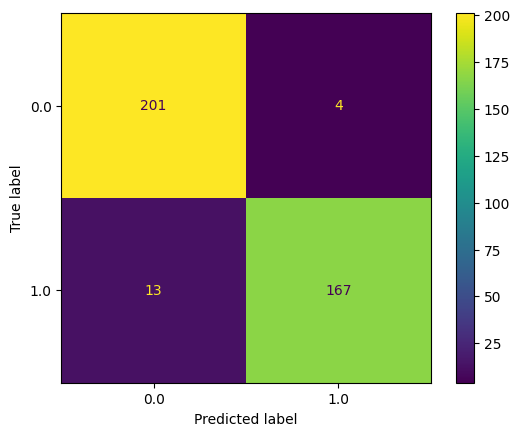

In [48]:
cmd=ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test,y_pred,labels=lr.classes_),display_labels=lr.classes_)
cmd.plot()